In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 26c

## Layer Conv2DTranspose Explained
<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [5]:
# Lets import some libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')  # do we have GPU

if len(physical_devices) > 0:

    print(f'GPUs {physical_devices}')
    try: 
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        
    except RuntimeError: pass

tf.keras.backend.clear_session()

%matplotlib inline

GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# some global variables

RANDOM_STATE = 24

inpDir = '../input'

outDir = '../output'

# Set the ploting parameters
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12, 5),
          'axes.labelsize': 'medium',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
         }

plt.rcParams.update(params)

## Set random seed
#np.random.seed(42)

#Set some random state
np.random.RandomState(seed=RANDOM_STATE);

# Hyperparameters
ALPHA = 0.01 # learning rate
EPOCHS = 1000

<Axes: >

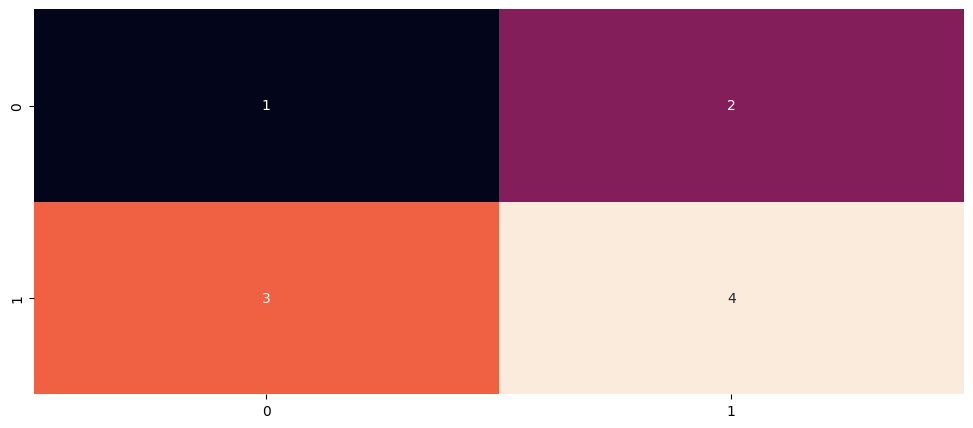

In [8]:
X = np.asarray([[1, 2],
             [3, 4]]) # some imput data

# reshape input data into sample x height x width x channel
X = X.reshape((1, 2, 2, 1))

sns.heatmap(X[0, :, :, 0], annot=True, fmt='d', cbar=False)

In [4]:
# define model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2DTranspose(1, (1,1), strides=(2,2), input_shape=(2, 2, 1)))

# summarize the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 4, 4, 1)           2         
 anspose)                                                        
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-01 07:23:35.323718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-01 07:23:35.323987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-01 07:23:35.324178: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:
# define weights such that all weights are one and bias as 0 so values do not change!
weights = [np.asarray([[[[1]]]]), np.asarray([0])] 

# store the weights in the model
model.set_weights(weights) 

# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((4, 4))
# summarize output
print(yhat)

2024-06-01 07:27:57.336802: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


1/1 [==============================] - 0s 462ms/step
[[1. 0. 2. 0.]
 [0. 0. 0. 0.]
 [3. 0. 4. 0.]
 [0. 0. 0. 0.]]


<Axes: >

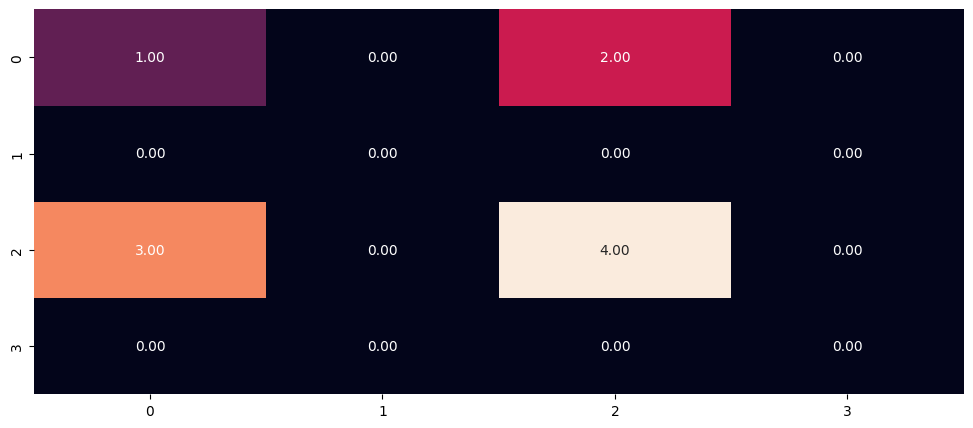

In [12]:
sns.heatmap(yhat, annot=True, fmt='.2f', cbar=False)